**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *


In [2]:
%%capture
ana_inf = InflationrateAnalysis('inflationrate')

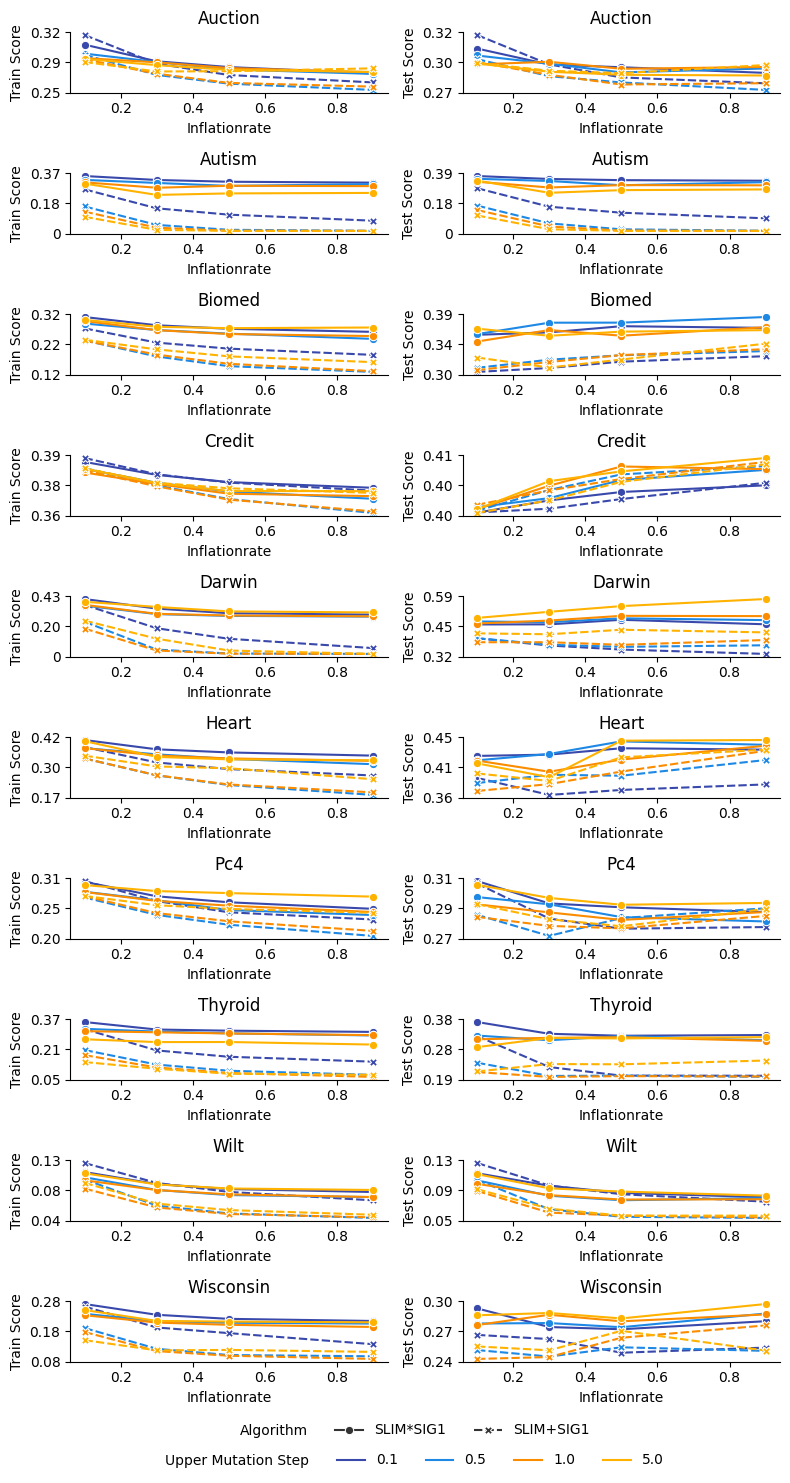

In [3]:
ana_inf.performance_by_p_inflate_plot[0]

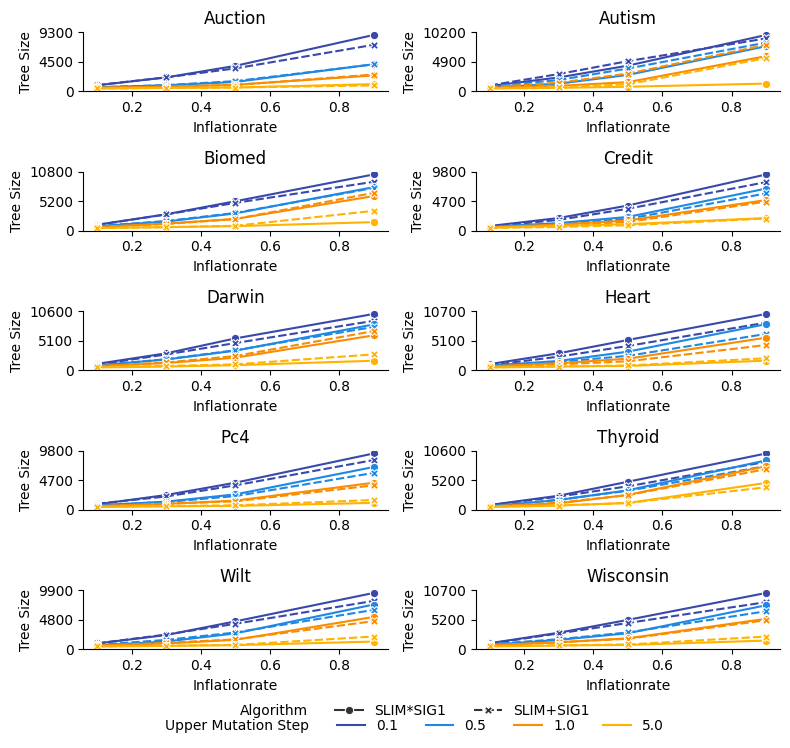

In [4]:
ana_inf.tree_size_by_p_inflate_plot[0]

In [5]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.7364548153183972

In [6]:
lr.coef_, lr.intercept_

(array([7003.59709821, -542.20042595]), 137.87880549860574)

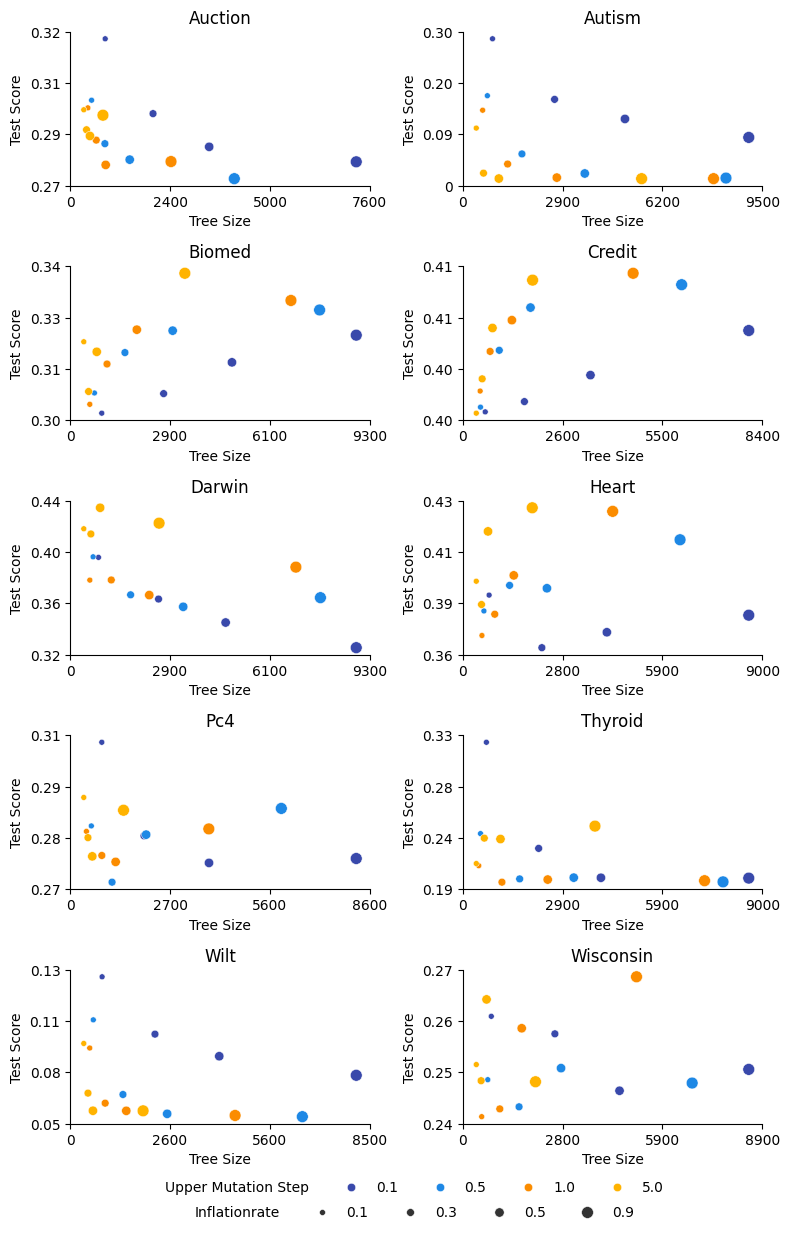

In [7]:
ana_inf.performance_complexity_tradeoff_plussig1_plot[0]

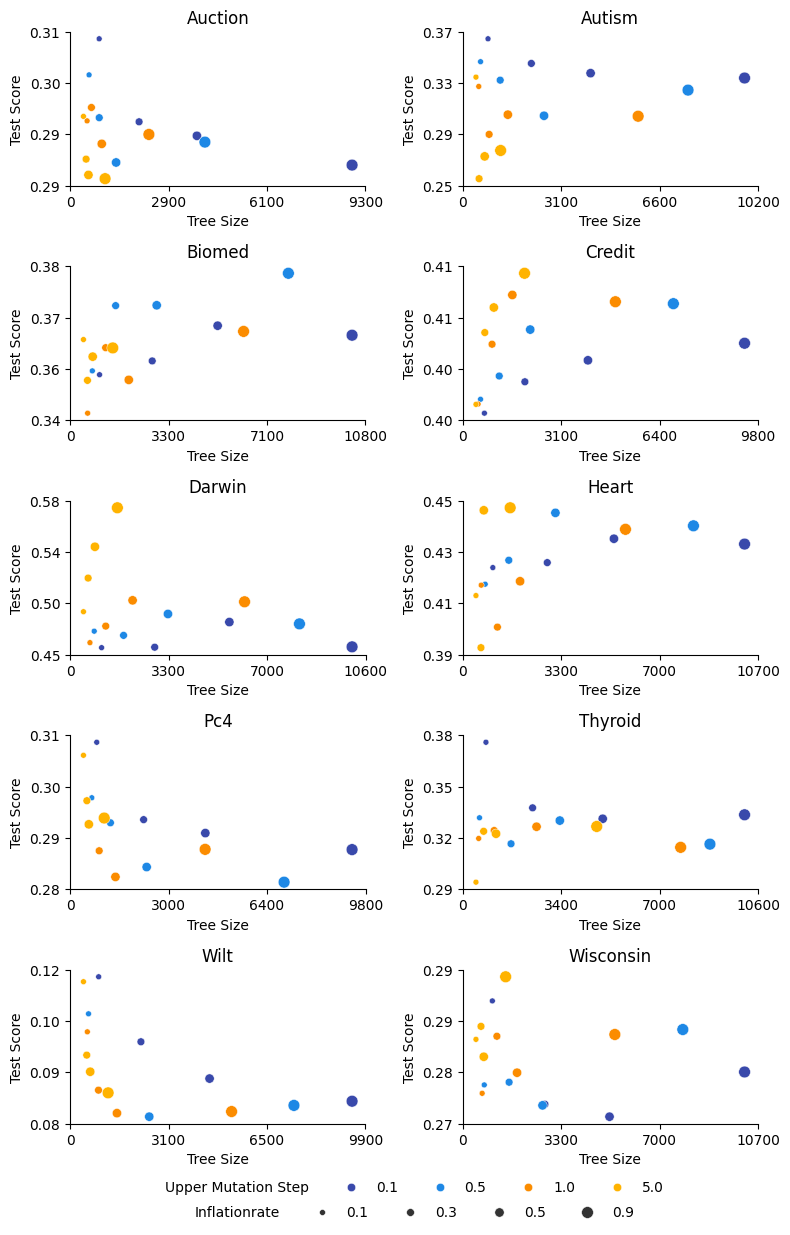

In [8]:
ana_inf.performance_complexity_tradeoff_mulsig1_plot[0]

In [9]:
a = ana.results[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']].drop_duplicates().reset_index(drop=True)
ana.logs['config_id'] = ana.logs['config_id'].astype(int)
df = pd.merge(
    ana.logs[['config_id', 'elite_nodes', 'generation']],
    a,
    on='config_id',
    how='right'
)

df['gen*p_inflate'] = df['config.p_inflate']  * df['generation']
df.drop(columns=['config_id'], inplace=True)
df = pd.get_dummies(df, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['elite_nodes', 'config.p_inflate', 'generation'])
#X['x2'] = X['gen*p_inflate'] * X['gen*p_inflate']
y = df['elite_nodes']


lr = LinearRegression()
lr.fit(X, y)
print(r2_score(y, lr.predict(X)))
lr.coef_, lr.intercept_

NameError: name 'ana' is not defined

In [ ]:

X = ana_inf.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

KeyError: "['dataset_name', 'name'] not in index"

(array([7003.59709821, -542.20042595]), 137.87880549860574)